In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#os.chdir("/home/anubrata/Documents/datascience")
os.getcwd()

'/home/anubrata/Documents/aarti_data/new_data'

In [2]:
arti_data=pd.read_csv("A_cip-1_SNP.csv",encoding="utf-16")

In [17]:
arti_data[arti_data.Gene_ID=='--']

,Chrom,Position,Reference,Variant,Type,Zygosity,Quality,Coverage,Gene_ID,Trancript_ID,Exon_ID,Exon_Rank,Effect,old_AA/new_AA,Old_codon/New_codon,Codon_Num(CDS)
42,NC_003197.2,5890,T,C,SNP,Hom,221.9990,1221,--,--,--,--,INTERGENIC,NaN,NaN,NaN
62,NC_003197.2,7420,G,T,SNP,Hom,221.9990,1090,--,--,--,--,INTERGENIC,NaN,NaN,NaN
63,NC_003197.2,7432,A,G,SNP,Hom,221.9990,1125,--,--,--,--,INTERGENIC,NaN,NaN,NaN
64,NC_003197.2,7508,T,C,SNP,Hom,221.9990,1287,--,--,--,--,INTERGENIC,NaN,NaN,NaN
78,NC_003197.2,9326,A,G,SNP,Hom,221.9990,1440,--,--,--,--,INTERGENIC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40840,NC_003197.2,4855324,A,G,SNP,Hom,88.9974,1039,--,--,--,--,INTERGENIC,NaN,NaN,NaN
40841,NC_003197.2,4855368,A,G,SNP,Hom,221.9990,1083,--,--,--,--,INTERGENIC,NaN,NaN,NaN
40842,NC_003197.2,4855382,G,A,SNP,Hom,221.9990,1062,--,--,--,--,INTERGENIC,NaN,NaN,NaN
40846,NC_003197.2,4856558,T,C,SNP,Hom,221.9990,512,--,--,--,--,INTERGENIC,NaN,NaN,NaN


In [3]:
rev_data=arti_data.drop(['Chrom','Type','Zygosity','Trancript_ID','Exon_ID'],axis=1)
rev_data['Gene_ID']=rev_data['Gene_ID'].replace('--','Intergenic')
#mutated=pd.value_counts(rev_data.Gene_ID)
#highly_mutated=mutated[mutated>50]
#highly_mutated.to_csv("highly_mutated.csv")
#mutated.to_csv("mutated.csv")
rev_data.head()

,Position,Reference,Variant,Quality,Coverage,Gene_ID,Exon_Rank,Effect,old_AA/new_AA,Old_codon/New_codon,Codon_Num(CDS)
0,507,C,T,221.999,1028,thrA,1,SYNONYMOUS_CODING,G/G,ggC/ggT,57.0
1,537,A,C,221.999,1130,thrA,1,SYNONYMOUS_CODING,A/A,gcA/gcC,67.0
2,744,A,C,221.999,1316,thrA,1,SYNONYMOUS_CODING,G/G,ggA/ggC,136.0
3,747,T,C,221.999,1431,thrA,1,SYNONYMOUS_CODING,L/L,ctT/ctC,137.0
4,762,G,A,221.999,1355,thrA,1,SYNONYMOUS_CODING,G/G,ggG/ggA,142.0


In [38]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
x=pd.value_counts(rev_data.Gene_ID)
x[x>30]
x.to_csv("highly_mutated.csv")

/home/anubrata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [33]:
#rpoC mutation distribution
rpoC_data=rev_data[rev_data.Gene_ID=="rpoC"]
rpoC_mutSites=list(rpoC_data["Position"])
rpoC_mutSites
rpoC_gene=[n for n in range(4370012,4374250)]
len(rpoC_gene),len(rpoC_mutSites)

(4238, 52)

/home/anubrata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


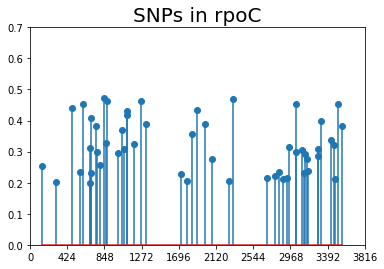

In [73]:
values=np.random.uniform(size=52,low=0.2,high=0.5)
plt.stem(rpoC_mutSites,values)
plt.title("SNPs in rpoC",fontsize=20)
plt.xlim(4370157,4374198)
plt.ylim(0,0.7)
locs,labels=plt.xticks()
lst=[n for n in range(0,4240,(4240//10))]
plt.xticks(locs,lst)
plt.savefig("SNP rpoC.jpg",dpi=100,bbox_inches="tight")

In [19]:
#metH mutation distribution
metH_data=rev_data[rev_data.Gene_ID=="metH"]
metH_mutSites=list(metH_data["Position"])
metH_gene=[n for n in range(4408069,4412035)]
len(metH_gene),len(metH_mutSites)

(3966, 65)

/home/anubrata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


([<matplotlib.axis.XTick at 0x7f98c61fa910>,
 <a list of 10 Text xticklabel objects>)

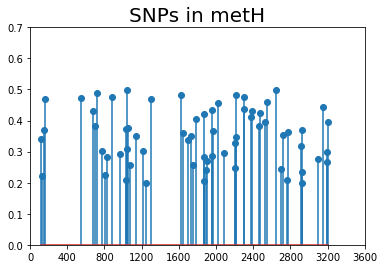

In [28]:
values=np.random.uniform(size=65,low=0.2,high=0.5)
plt.stem(metH_mutSites,values)
plt.title("SNPs in metH",fontsize=20)
plt.xlim(4408069,4412035)
plt.ylim(0,0.7)
locs,labels=plt.xticks()
lst=[n for n in range(0,4000,(4000//10))]
plt.xticks(locs,lst)
#plt.savefig("SNP metH.jpg",dpi=100,bbox_inches="tight")

/home/anubrata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x7f98bdb6e110>,
  ...],
 <a list of 3966 Text xticklabel objects>)

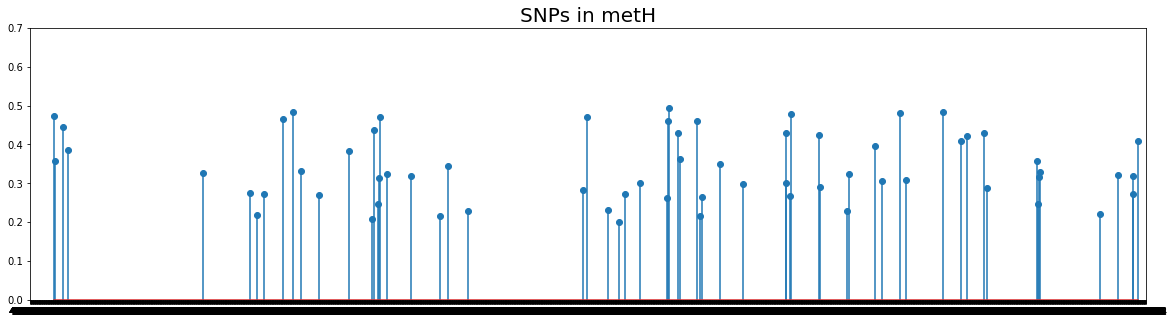

In [52]:
plt.figure(figsize=(20,5))
values=np.random.uniform(size=65,low=0.2,high=0.5)
plt.stem(metH_mutSites,values)
plt.title("SNPs in metH",fontsize=20)
plt.xlim(4408069,4412035)
plt.ylim(0,0.7)
#locs,labels=plt.xticks()
lst=[n for n in range(4400000,4413000,(4000//10))]
plt.xticks(metH_gene)
#plt.savefig("SNP metH.jpg",dpi=100,bbox_inches="tight")

In [50]:
metH_gene[1:10]

[4408070,
 4408071,
 4408072,
 4408073,
 4408074,
 4408075,
 4408076,
 4408077,
 4408078]